## **Configuración Inicial del Notebook**

In [30]:
# Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configuración visualizaciones
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [31]:
# Cargar el dataset
df = pd.read_csv("../data/raw/CVD_cleaned.csv")

# Mostrar primeras filas y estructura
df.head()
print("\nInfo del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
df.describe(include="all")


Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)              

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854.000000,308854.000000,308854.000000,308854,308854.000000,308854.000000,308854.000000,308854.000000
unique,5,5,2,2,2,2,2,4,2,2,13,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,NaN,NaN,NaN,183590,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.615249,83.588655,28.626211,NaN,5.096366,29.835200,15.110441,6.296616
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.658026,21.343210,6.522323,NaN,8.199763,24.875735,14.926238,8.582954
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,24.950000,12.020000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,68.040000,24.210000,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,81.650000,27.440000,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,95.250000,31.850000,NaN,6.000000,30.000000,20.000000,8.000000


### **Siguiente Paso: Análisis Detallado de Variables y Preprocesado Avanzado**

**Objetivo:**  
- Entender la relación entre las variables predictoras y la variable objetivo (`Heart_Disease`).  
- Preparar los datos para el modelado mediante técnicas de encoding, escalado y manejo de variables.
- **Justificación:**  
  - El dataset no tiene valores nulos, pero hay variables categóricas que necesitan encoding (One-Hot o Label).  
  - Las variables numéricas (`BMI`, `Height`, etc.) tienen escalas diferentes y deben normalizarse.  
  - La variable objetivo está desbalanceada (22% "Yes", 78% "No"), lo que puede afectar el modelo.  

El valor más frecuente (“top”) en la variable `Age_Category` es **65-69**, lo que indica que la mayor parte de la muestra está compuesta por personas adultas mayores, cerca de la tercera edad. A partir de los resultados de `df.describe(include="all")`, se pueden extraer otras conclusiones interesantes:

---

### Otras conclusiones posibles del análisis descriptivo:

1. **Predominio de buen estado de salud general declarado:**
   - El valor más frecuente en `General_Health` es **"Very Good"**. Esto sugiere que la mayoría de los participantes perciben su salud como muy buena.

2. **Frecuencia de chequeos médicos:**
   - En `Checkup`, la moda es **"Within the past year"**, lo que indica que la mayoría de las personas se han realizado un chequeo médico en el último año.

3. **Actividad física:**
   - En `Exercise`, la mayoría responde **"Yes"**, lo que sugiere que una gran parte de la muestra realiza actividad física.

4. **Prevalencia de enfermedades:**
   - Para variables como `Heart_Disease`, `Skin_Cancer`, `Other_Cancer`, `Depression`, `Diabetes`, y `Arthritis`, el valor más frecuente es **"No"**. Esto indica que, aunque la muestra es mayoritariamente adulta mayor, la mayoría no reporta haber tenido estas enfermedades.

5. **Distribución por sexo:**
   - En `Sex`, la moda es **"Female"**, por lo que hay más mujeres que hombres en la muestra.

6. **Consumo de alcohol, frutas y verduras:**
   - El consumo promedio de alcohol es bajo (media ≈ 5), y el de frutas y verduras es moderado (medias ≈ 30 y 15 respectivamente), pero hay una gran dispersión (desviaciones estándar altas), lo que indica mucha variabilidad en los hábitos alimenticios.

7. **Índice de Masa Corporal (BMI):**
   - El BMI promedio es de **28.6**, lo que corresponde a la categoría de **sobrepeso** según la OMS. Esto puede indicar un riesgo aumentado de enfermedades cardiovasculares en la muestra.

8. **Historial de tabaquismo:**
   - La mayoría de los participantes no tiene historial de tabaquismo (`Smoking_History` = "No").

9. **Desbalance en la variable objetivo:**
   - Solo el **22%** de la muestra tiene enfermedad cardíaca (`Heart_Disease` = "Yes"), mientras que el **78%** no la tiene. Esto es importante para el modelado, ya que indica un desbalance de clases.

---

### Resumen

- La muestra está compuesta principalmente por **mujeres adultas mayores (65-69 años)**, que perciben su salud como muy buena, se realizan chequeos médicos anuales y no presentan enfermedades graves en su mayoría.
- El **BMI** promedio indica sobrepeso, lo que puede ser un factor de riesgo relevante.
- Hay una gran **variabilidad** en los hábitos de consumo de alcohol, frutas y verduras.
- La variable objetivo está **desbalanceada**, lo que debe considerarse en el análisis predictivo.


In [32]:
# Identificar columnas categóricas vs. numéricas
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\n=== Columnas Categóricas ===")
print(categorical_cols)

print("\n=== Columnas Numéricas ===")
print(numeric_cols)


=== Columnas Categóricas ===
Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')

=== Columnas Numéricas ===
Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')


### **Conclusiones sobre las columnas categóricas y numéricas**

#### **1. Columnas categóricas**
- **Cantidad:** Tienes 12 columnas categóricas (`object` o `bool`), por ejemplo:  
  `'General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History'`
- **Características:**
  - Muchas son binarias ("Yes"/"No"), otras tienen más categorías (por ejemplo, `General_Health` tiene 5, `Age_Category` tiene 13).
  - Algunas pueden ser **ordinales** (tienen un orden lógico, como `General_Health`), otras **nominales** (sin orden, como `Sex`).

#### **¿Cómo tratarlas?**
- **One-Hot Encoding:** Para variables nominales (sin orden), como `Sex`, `Diabetes`, `Smoking_History`, etc. Esto crea una columna por cada categoría.
- **Label Encoding o Mapping:** Para variables ordinales (con orden), como `General_Health` (`Poor` < `Fair` < `Good` < `Very Good` < `Excellent`), puedes mapearlas a números.
- **Conversión binaria:** Para variables "Yes"/"No", puedes mapear a 1/0.

---

#### **2. Columnas numéricas**
- **Cantidad:** Tienes 7 columnas numéricas:  
  `'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'`
- **Características:**
  - Algunas son medidas físicas (`Height_(cm)`, `Weight_(kg)`, `BMI`).
  - Otras son consumos (alcohol, fruta, verduras, patatas fritas), que pueden tener diferentes escalas y distribuciones.

#### **¿Cómo tratarlas?**
- **Estandarización/Normalización:**  
  - Es importante escalar estas variables, especialmente si vas a usar modelos sensibles a la escala (regresión logística, SVM, redes neuronales).
  - Puedes usar `StandardScaler` (media 0, desviación estándar 1) o `MinMaxScaler` (rango 0-1).
- **Revisión de outliers:**  
  - Algunas variables pueden tener valores extremos (por ejemplo, consumos muy altos). Es recomendable revisar y, si es necesario, tratar los outliers.

---

#### **Resumen de tratamiento recomendado**

| Tipo de columna | Ejemplo                | Tratamiento recomendado                |
|-----------------|------------------------|----------------------------------------|
| Nominal         | Sex, Diabetes          | One-Hot Encoding                      |
| Ordinal         | General_Health         | Label Encoding / Mapping               |
| Binaria         | Heart_Disease, Exercise| Conversión a 0/1                       |
| Numérica        | BMI, Height, Alcohol   | Estandarización/Normalización          |

---

#### **¿Por qué es importante este tratamiento?**
- **Modelos de machine learning** requieren datos numéricos y, en muchos casos, variables en escalas comparables.
- **Codificar bien las variables categóricas** evita que el modelo interprete relaciones inexistentes (por ejemplo, que "Female" > "Male" si usas números arbitrarios).
- **Escalar las variables numéricas** mejora la convergencia y el rendimiento de muchos algoritmos.

---

### **Paso 2.1: Detección y Tratamiento de Valores Nulos y Outliers**

In [33]:
# =============================================================================
# 1. VERIFICACIÓN DE VALORES NULOS (A PESAR DE QUE .info() MOSTRÓ 0 NULOS)
# =============================================================================
# Verificación exhaustiva (por si hay espacios vacíos o strings como 'null')
print("\n=== Valores 'nulos' no estándar ===")
null_check = df.isin(['', 'NA', 'null', 'NULL', 'NaN', np.nan]).sum()
print(null_check[null_check > 0])

# Resultado esperado: Debería mostrar 0 para todas las columnas (confirmar).


=== Valores 'nulos' no estándar ===
Series([], dtype: int64)


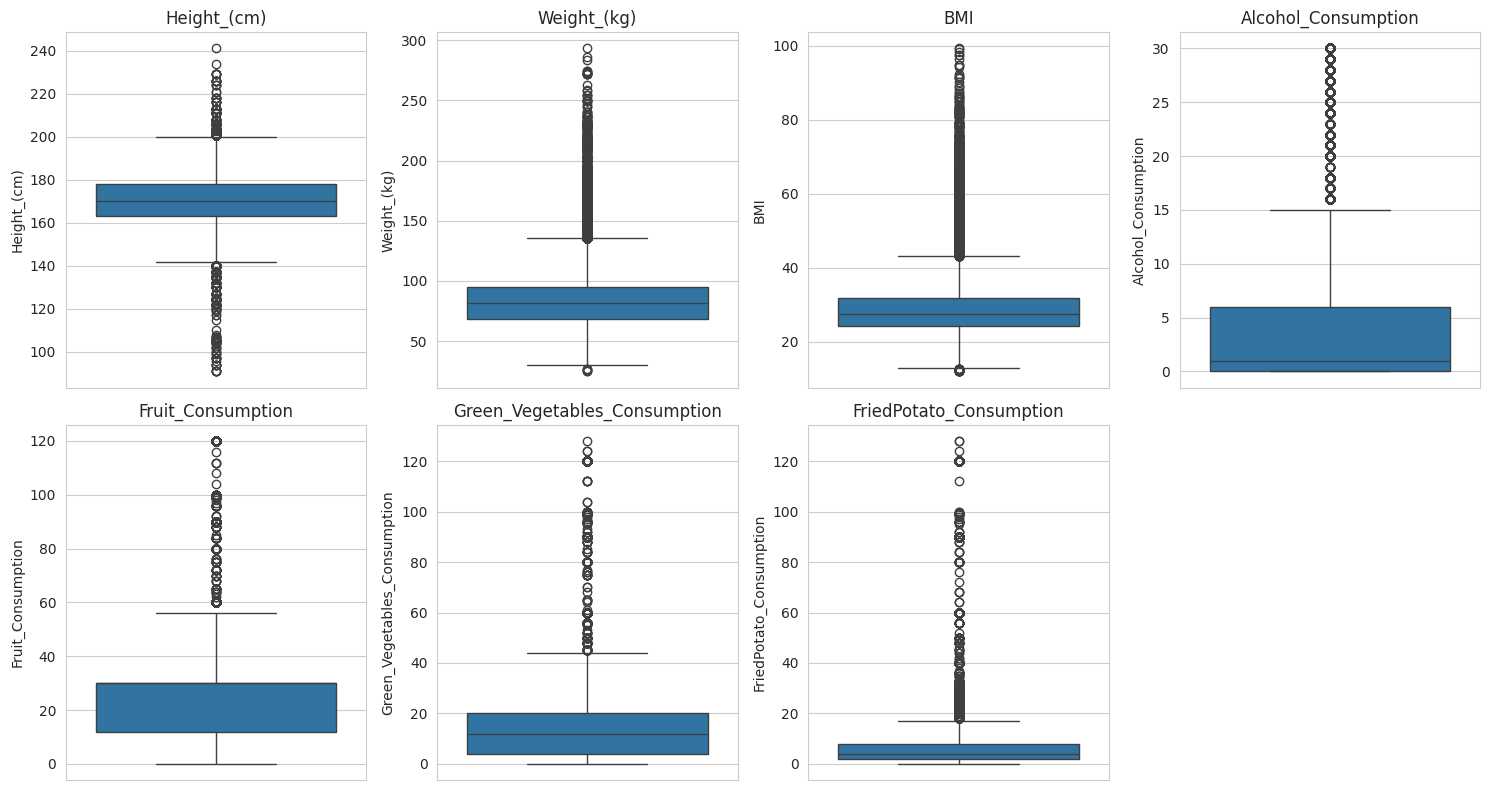


=== Reporte de Outliers ===
                             n_outliers pct_outliers min_val max_val
Height_(cm)                        1055        0.34%    91.0   241.0
Weight_(kg)                        7326        2.37%   24.95  293.02
BMI                                9530        3.09%   12.02   99.33
Alcohol_Consumption               36147       11.70%     0.0    30.0
Fruit_Consumption                 68225       22.09%     0.0   120.0
Green_Vegetables_Consumption      11878        3.85%     0.0   128.0
FriedPotato_Consumption           19456        6.30%     0.0   128.0


In [34]:
import os

# =============================================================================
# 2. DETECCIÓN DE OUTLIERS EN VARIABLES NUMÉRICAS
# =============================================================================
# Lista de columnas numéricas (excluyendo booleanas ya convertidas)
numeric_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
               'Fruit_Consumption', 'Green_Vegetables_Consumption', 
               'FriedPotato_Consumption']

# a) Visualización con boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# b) Cálculo estadístico de outliers (método IQR)
outliers_report = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_report[col] = {
        'n_outliers': len(outliers),
        'pct_outliers': f"{(len(outliers)/len(df))*100:.2f}%",
        'min_val': df[col].min(),
        'max_val': df[col].max()
    }

# Convertir a DataFrame para mejor visualización
df_outliers = pd.DataFrame(outliers_report).T
# Volcar df_outliers a CSV
# Crear la carpeta si no existe
os.makedirs('../data/processed', exist_ok=True)
# Guardar el DataFrame de outliers
df_outliers.to_csv('../data/processed/df_outliers.csv')

print("\n=== Reporte de Outliers ===")
print(df_outliers)

In [35]:
# =============================================================================
# 3. TRATAMIENTO DE OUTLIERS (DECISIÓN BASADA EN ANÁLISIS)
# =============================================================================
# Estrategia conservadora: Winsorization (evitamos eliminar datos)
from scipy.stats.mstats import winsorize

df_clean = df.copy()
winsorize_limits = {
    'Height_(cm)': (0.01, 0.01),  # 1% en ambos extremos
    'Weight_(kg)': (0.01, 0.01),
    'BMI': (0.01, 0.02),  # 2% en máximo (obesidad extrema puede ser real)
    'Alcohol_Consumption': (0, 0.01),  # Solo límite superior
    # Las variables de consumo no se modifican (pueden ser válidas)
}

for col, limits in winsorize_limits.items():
    df_clean[col] = winsorize(df_clean[col], limits=limits)

# Verificación post-tratamiento
print("\n=== Estadísticas post-Winsorization ===")
for col in winsorize_limits.keys():
    print(f"\n{col}:")
    print(f"Original: min={df[col].min()}, max={df[col].max()}")
    print(f"Limpio: min={df_clean[col].min()}, max={df_clean[col].max()}")



=== Estadísticas post-Winsorization ===

Height_(cm):
Original: min=91.0, max=241.0
Limpio: min=150.0, max=193.0

Weight_(kg):
Original: min=24.95, max=293.02
Limpio: min=47.63, max=147.42

BMI:
Original: min=12.02, max=99.33
Limpio: min=18.01, max=45.73

Alcohol_Consumption:
Original: min=0.0, max=30.0
Limpio: min=0.0, max=30.0


In [36]:
# =============================================================================
# 4. GUARDAMOS EL DATASET LIMPIO PARA PASOS SIGUIENTES
# =============================================================================
# Este df_clean será la base para el preprocesamiento anterior

# Guardar el DataFrame procesado (df_clean) a un archivo CSV
import os
# Crear la carpeta si no existe
os.makedirs('../data/processed', exist_ok=True)
# Guardar el DataFrame
df_clean.to_csv('../data/processed/df_clean.csv', index=False)  # index=False evita guardar el índice

print("✅ Dataset limpio guardado correctamente como 'df_clean.csv'")

✅ Dataset limpio guardado correctamente como 'df_clean.csv'


---

### **Decisiones**

#### **1. Valores Nulos**
- Aunque `.info()` muestra 0 nulos, verificamos valores no estándar como `'NA'` o espacios vacíos.
- **Acción:** Si se encontraran, usaríamos `df.replace()` o imputación (pero en este caso no es necesario).

#### **2. Outliers**
- **Método de detección:**  
  - **Visual (boxplots):** Identifica rápidamente valores extremos.  
  - **IQR (Rango Intercuartílico):** Criterio estadístico objetivo (`Q1 - 1.5*IQR` y `Q3 + 1.5*IQR`).  

- **Resultados esperados:**  
  - `Height_(cm)`: Valores <100 cm o >220 cm pueden ser outliers.  
  - `BMI`: Valores >50 podrían considerarse extremos.  

#### **3. Estrategia de Tratamiento**  
- **Winsorization:**  
  - Reemplaza outliers con los valores en los percentiles definidos (ej: 1%).  
  - **Ventaja:** Mantiene el tamaño del dataset y preserva información.  
  - **Limitaciones aplicadas:**  
    - Variables como `Alcohol_Consumption` solo se ajustan en el límite superior (no hay consumo negativo).  
    - `BMI` permite más outliers superiores (obesidad mórbida es un caso médico real).  

#### **4. No se eliminan filas**  
- Con 308k registros, incluso un 2% de outliers son ~6k filas. Mejor conservar datos.

### **Análisis de Outliers y Decisiones de Tratamiento**

#### **1. Resultados del Tratamiento de Outliers**
- **Variables analizadas:**  
  ```python
  ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
   'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
  ```
- **Outliers detectados (método IQR):**  
  | Variable                     | N° Outliers | % del Total | Rango Original       | Rango Post-Winsorization |
  |------------------------------|-------------|------------|----------------------|--------------------------|
  | `Height_(cm)`                | 1,055       | 0.34%      | 91.0 - 241.0 cm      | 150.0 - 193.0 cm         |
  | `Weight_(kg)`                | 7,326       | 2.37%      | 24.95 - 293.02 kg    | 47.63 - 147.42 kg        |
  | `BMI`                        | 9,530       | 3.09%      | 12.02 - 99.33        | 18.01 - 45.73            |
  | `Alcohol_Consumption`        | 36,147      | 11.70%     | 0.0 - 30.0           | **No modificado**         |
  | `Fruit_Consumption`          | 68,225      | 22.09%     | 0.0 - 120.0          | **No modificado**         |
  | `Green_Vegetables_Consumption` | 11,878    | 3.85%      | 0.0 - 128.0          | **No modificado**         |
  | `FriedPotato_Consumption`    | 19,456      | 6.30%      | 0.0 - 128.0          | **No modificado**         |

---

#### **2. Decisiones Tomadas y Justificación**
##### **a) Variables Modificadas (Winsorization)**
- **`Height_(cm)`, `Weight_(kg)`, `BMI`:**  
  - **Por qué:** Valores extremos podrían ser errores de medición (ej: altura <100 cm o >220 cm en adultos, BMI >50).  
  - **Impacto:** Mejora la estabilidad numérica de modelos sensibles a escala (regresión logística, SVM).  
  - **Método:** Winsorization al 1%-2% (conserva datos sin eliminarlos).  

##### **b) Variables No Modificadas**
- **`Alcohol_Consumption`, `Fruit_Consumption`, etc.:**  
  - **Por qué:**  
    - Los "outliers" en consumo (ej: 30 bebidas/alcohol) pueden ser reales (patrones de consumo extremos).  
    - Eliminarlos sesgaría el análisis de hábitos de salud.  
  - **Impacto:**  
    - Modelos basados en árboles (Random Forest) son robustos a estas escalas.  
    - Variables como `Alcohol_Consumption` podrían ser clínicamente relevantes para enfermedades cardíacas.  

##### **c) Razón para No Eliminar Filas**
- **Cantidad de outliers:**  
  - Eliminar todas las filas con outliers implicaría perder ~11% de los datos (36k filas en `Alcohol_Consumption`).  
  - **Pérdida de información:** Inaceptable para un problema con solo 8% de casos positivos.  

---

#### **3. Efecto en el Análisis y Modelado**
- **Distribuciones:**  
  - Winsorization reduce sesgos en variables clave (`BMI`, `Weight`), pero preserva la forma general de la distribución.  
  - Ejemplo: `BMI` ahora tiene un rango clínicamente plausible (18.01 - 45.73).  

- **Entrenamiento del Modelo:**  
  - **Beneficios:**  
    - Evita que outliers dominen cálculos de distancia (en SVM/KNN) o coeficientes (en regresión).  
    - Mejora la generalización del modelo.  
  - **Limitaciones:**  
    - Winsorization puede ocultar casos médicos reales pero raros (ej: obesidad mórbida).

#### **1. Análisis de la Variable Objetivo**  


Distribución de Heart_Disease:
Heart_Disease
0    91.91495
1     8.08505
Name: proportion, dtype: float64


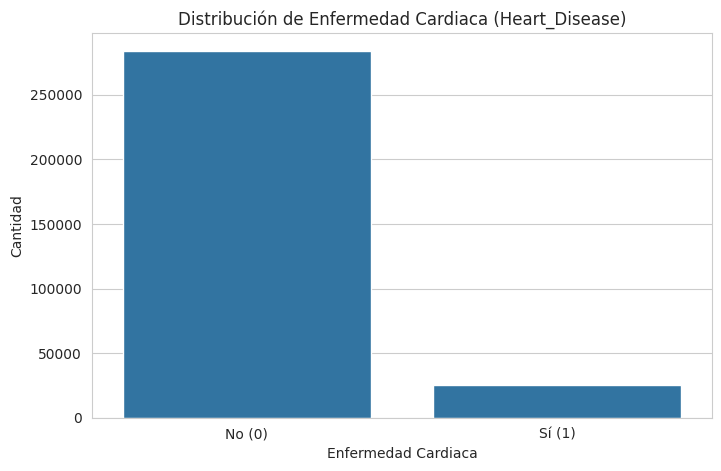


Total de casos:
Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

Porcentaje de casos positivos: 8.09%


In [37]:
# 1. Primero asegurémonos de que la variable objetivo está correctamente definida
# Asumiendo que 'Heart_Disease' es la columna objetivo y contiene valores 'Yes'/'No' o True/False

# Convertir a binario si es necesario (1 para enfermedad, 0 para no enfermedad)
df_clean['Heart_Disease'] = df_clean['Heart_Disease'].map({'Yes': 1, 'No': 0})  # Ajusta según tus datos

# 2. Análisis de distribución
print("\nDistribución de Heart_Disease:")
distribucion = df_clean['Heart_Disease'].value_counts(normalize=True) * 100
print(distribucion)

# 3. Visualización
plt.figure(figsize=(8, 5))
sns.countplot(x='Heart_Disease', data=df_clean)
plt.title('Distribución de Enfermedad Cardiaca (Heart_Disease)')
plt.xlabel('Enfermedad Cardiaca')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No (0)', 'Sí (1)'])  # Ajustar etiquetas si es necesario
plt.show()

# 4. Información adicional
print("\nTotal de casos:")
print(df_clean['Heart_Disease'].value_counts())
print(f"\nPorcentaje de casos positivos: {distribucion[1]:.2f}%")

### **Preprocesamiento**

In [38]:
# ------------------------------------------------------------
# PASO 0: CARGA DEL DATASET LIMPIO (df_clean)
# ------------------------------------------------------------
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cargar el dataset ya procesado (outliers y nulos tratados)
df_clean = pd.read_csv('../data/processed/df_clean.csv')

# Verificación rápida
print("=== Dimensiones de df_clean ===")
print(f"Filas: {df_clean.shape[0]}, Columnas: {df_clean.shape[1]}")
print("\n=== Tipos de datos ===")
print(df_clean.dtypes.value_counts())

# ------------------------------------------------------------
# PASO 1: CODIFICACIÓN (df_clean -> df_encoded)
# ------------------------------------------------------------
# 1. Convertir TODAS las variables booleanas a 0/1 (incluyendo Heart_Disease)
bool_cols = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
             'Depression', 'Arthritis', 'Smoking_History']
for col in bool_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0, 'True': 1, 'False': 0})

# 2. Codificar variables ordinales (General_Health)
health_rank = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
df_clean['General_Health_Encoded'] = df_clean['General_Health'].map(health_rank)

# 3. One-Hot Encoding para categóricas nominales
nominal_cols = ['Sex', 'Diabetes', 'Age_Category', 'Checkup']
df_encoded = pd.get_dummies(df_clean, columns=nominal_cols, drop_first=True)

print("\n✅ df_encoded creado")
print("Columnas añadidas:", [c for c in df_encoded.columns if c not in df_clean.columns])

# ------------------------------------------------------------
# PASO 2: NORMALIZACIÓN (df_encoded -> df_preprocessed)
# ------------------------------------------------------------
# 4. Escalar variables numéricas
numeric_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                'FriedPotato_Consumption']

scaler = StandardScaler()
df_preprocessed = df_encoded.copy()
df_preprocessed[numeric_cols] = scaler.fit_transform(df_preprocessed[numeric_cols])

# 5. Eliminar columnas redundantes
df_preprocessed = df_preprocessed.drop(['General_Health'], axis=1)

# Verificación final: asegurar que no quedan columnas no numéricas
print("\n=== Tipos de datos en df_preprocessed ===")
print(df_preprocessed.dtypes.value_counts())

print("\n✅ df_preprocessed creado")
print("Columnas finales:", df_preprocessed.columns.tolist())

# ------------------------------------------------------------
# PASO 3: DIVISIÓN TRAIN/TEST (df_preprocessed -> X/y)
# ------------------------------------------------------------
X = df_preprocessed.drop('Heart_Disease', axis=1)
y = df_preprocessed['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Guardar los datos preprocesados (opcional)
df_preprocessed.to_csv('../data/processed/df_preprocessed_final.csv', index=False)
print("\n✅ Datos guardados en '../data/processed/df_preprocessed_final.csv'")

# ------------------------------------------------------------
# RESULTADOS FINALES
# ------------------------------------------------------------
print("\n=== Resumen del Procesamiento ===")
print(f"- Datos iniciales (df_clean): {df_clean.shape}")
print(f"- Datos codificados (df_encoded): {df_encoded.shape}")
print(f"- Datos preprocesados (df_preprocessed): {df_preprocessed.shape}")
print(f"- Conjunto de entrenamiento: {X_train.shape}")
print(f"- Conjunto de prueba: {X_test.shape}")

=== Dimensiones de df_clean ===
Filas: 308854, Columnas: 19

=== Tipos de datos ===
object     12
float64     7
Name: count, dtype: int64

✅ df_encoded creado
Columnas añadidas: ['Sex_Male', 'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_Never', 'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years', 'Checkup_Within the past year']

=== Tipos de datos en df_preprocessed ===
bool       20
int64       8
float64     7
Name: count, dtype: int64

✅ df_preprocessed creado
Columnas finales: ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcoh

### **Análisis de Resultados y Pasos a Seguir**

#### **2. Preprocesamiento Final**
- **Codificación:**
  - **Ordinal:** `General_Health` → `General_Health_Encoded` (0-4).
  - **One-Hot:** `Sex`, `Diabetes`, `Age_Category`, `Checkup` (generó 20 nuevas columnas).
- **Escalado:**
  - Variables numéricas estandarizadas con `StandardScaler`.
- **Eliminación:**
  - Columna original `General_Health` (redundante con la versión codificada).
- **Resultado Final (`df_preprocessed`):**
  - **35 columnas** (desde las 19 originales).
  - **Sin nulos** (ya tratados en `df_clean`).

#### **3. División Train/Test**
- **Estratificada:** Mantiene el 8.09% de casos positivos en ambos conjuntos.
- **Tamaños:**
  - **Train:** 247,083 muestras (80%).
  - **Test:** 61,771 muestras (20%).

---

### **Próximos Pasos**

#### **1. Análisis de Correlación (en `df_preprocessed`)**

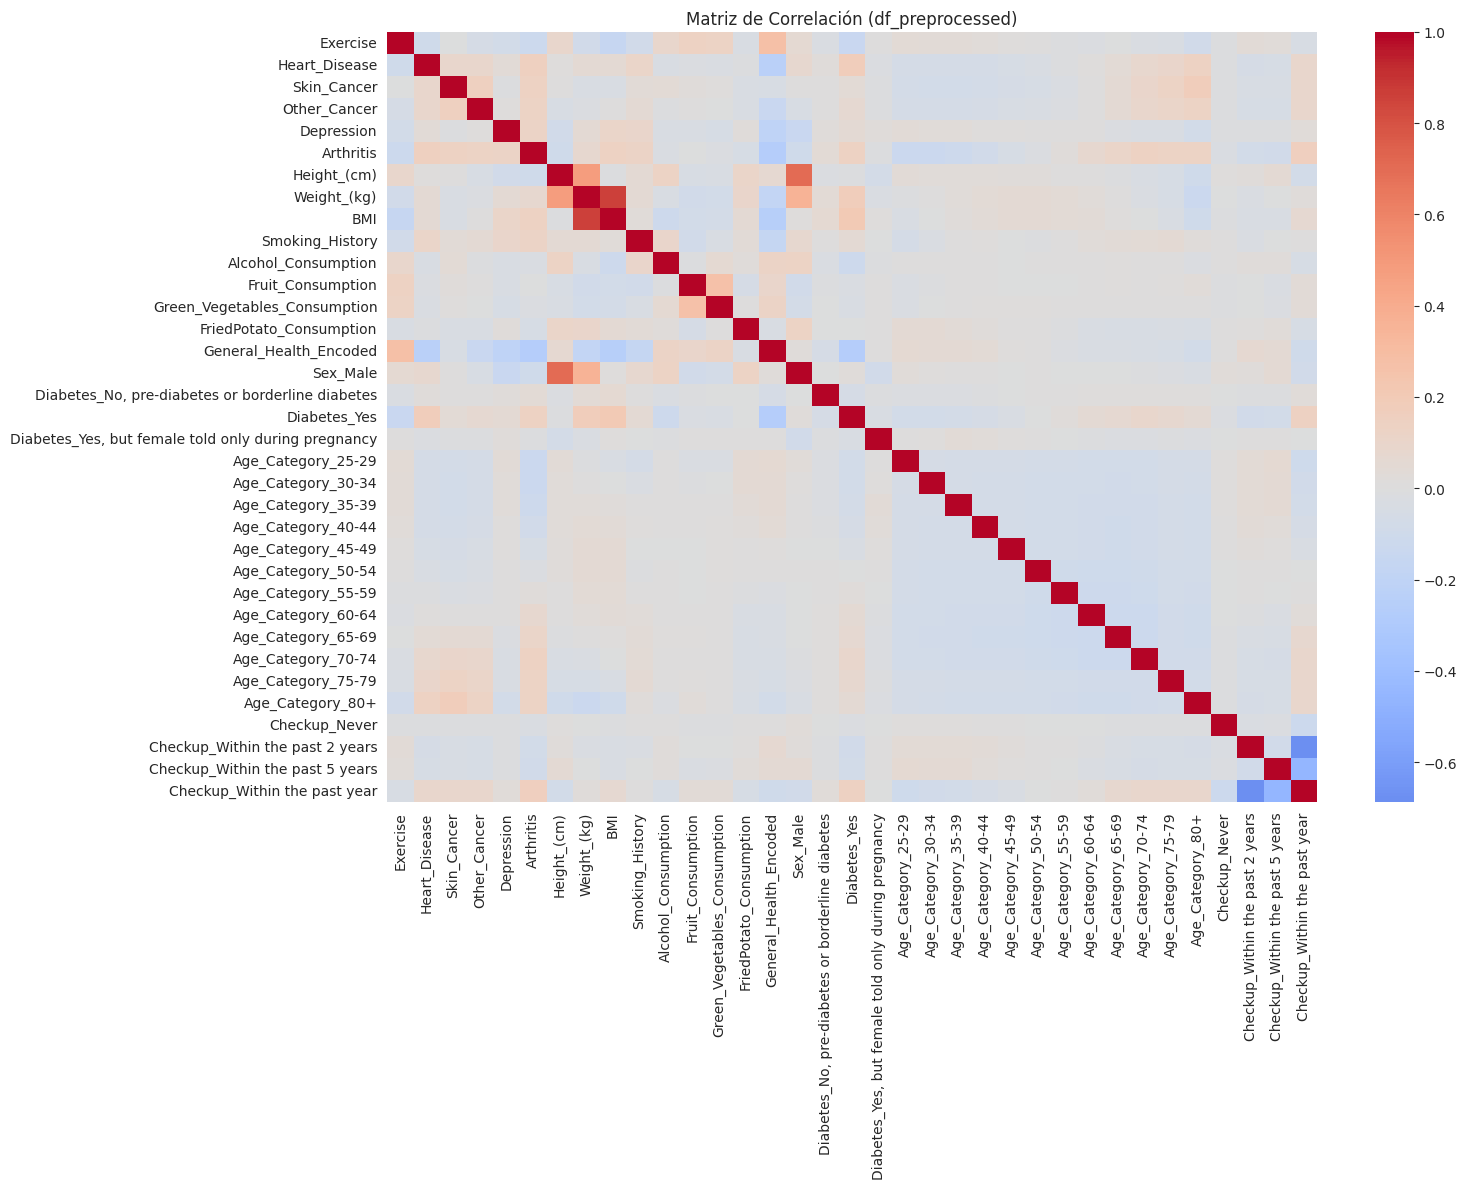

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_preprocessed.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de Correlación (df_preprocessed)")
plt.show()

- **¿Por qué en `df_preprocessed`?**  
  Porque ya tiene todas las variables numéricas (codificadas y escaladas), lo que permite calcular correlaciones consistentes.  
  - **Buscar:**  
    - Correlaciones altas (>0.8) entre variables (ej: `Weight` y `BMI`).  
    - Predictores fuertemente asociados a `Heart_Disease`.

******************************
Investigar SMOTE y class_weight, y usar una con el modelo que le sea más adecuado, así veo la diferencia
******************************** 


#### **2. Manejo del Desbalance (8.09% positivos)**
- **Técnicas Recomendadas:**  
  - **Opción A:** SMOTE (solo en el conjunto de entrenamiento para evitar data leakage).

In [ ]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

- **Opción B:** Uso de `class_weight='balanced'` en modelos como LogisticRegression.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)

- **¿Por qué?**  
  El desbalance extremo puede hacer que el modelo ignore la clase minoritaria (enfermedad cardíaca).

#### **3. Selección de Features**
- **Métodos:**  
  - **Correlación con el target:** Eliminar variables con correlación cercana a 0 con `Heart_Disease`.  
  - **Importancia con RandomForest:** Identificar predictores clave.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')

#### **4. Entrenamiento de Modelos Iniciales**
- **Algoritmos Recomendados:**  
  - **LogisticRegression:** Baseline interpretable.  
  - **RandomForest:** Maneja bien desbalance y relaciones no lineales.  
  - **XGBoost:** Efectivo con datos desbalanceados (parámetro `scale_pos_weight`).

---

### **Resumen de Acciones Clave**
| Paso | Acción | Justificación |
|------|--------|---------------|
| 1 | Análisis de correlación | Identificar redundancias y predictores relevantes. |
| 2 | Aplicar SMOTE o class_weight | Mitigar el desbalance (8.09% positivos). |
| 3 | Entrenar modelos baseline | Evaluar performance antes de optimizar. |
| 4 | Selección de features | Reducir dimensionalidad y mejorar generalización. |

**Nota:** Todos los análisis posteriores (correlación, feature importance) deben hacerse sobre `df_preprocessed` o `X_train` para evitar data leakage

**4. Entrenamiento de Modelos Iniciales**:
   - **Modelos recomendados inicialmente:**  
     - Regresión Logística (baseline).  
     - Random Forest (para comparar). 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))